In [23]:
import warnings
warnings.filterwarnings("ignore")

80.8 =https://www.kaggle.com/code/escape2free/titanic-prediction-eda-logistic-regression

# Step 1: Load Dataset

In [24]:
import pandas as pd

df = pd.read_csv("train.csv")
df.sample(5, random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


# Step 2: Exploratory Data Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature-Target Visualization

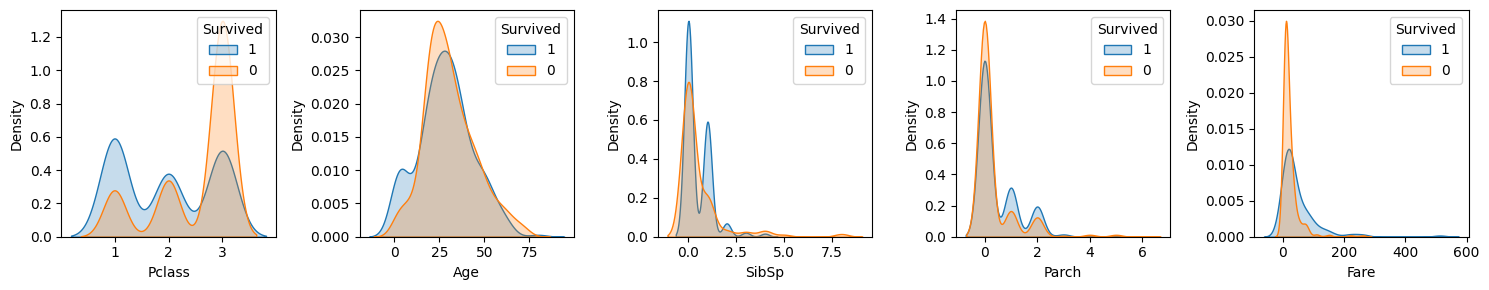

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
fig, axes = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True)
for feature, ax in zip(features, axes):
    plt.sca(ax)
    sns.kdeplot(df.loc[df["Survived"] == 1, feature], label="1", fill=True)
    sns.kdeplot(df.loc[df["Survived"] == 0, feature], label="0", fill=True)
    plt.legend(title="Survived")
plt.show()

## Missing Data Analysis

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

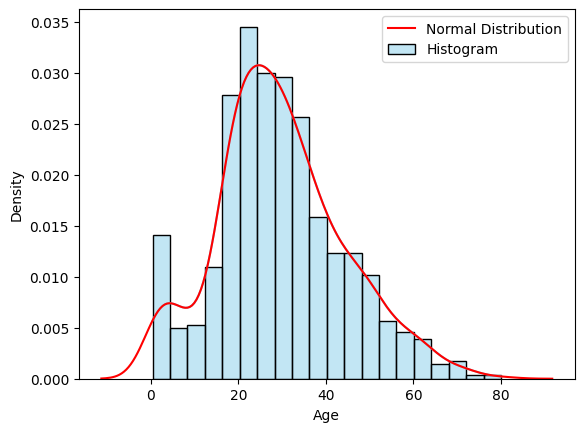

In [28]:
# Drop the missing values
data = df['Age'].dropna()
# plot a histogram
sns.histplot(data, kde=True, color='skyblue', label='Histogram', stat='density')
# plot a normal distribution curve
sns.kdeplot(data, color='r', label='Normal Distribution')
plt.legend()
plt.show()

In [29]:
sum(df['Cabin'].isnull()) / len(df)

0.7710437710437711

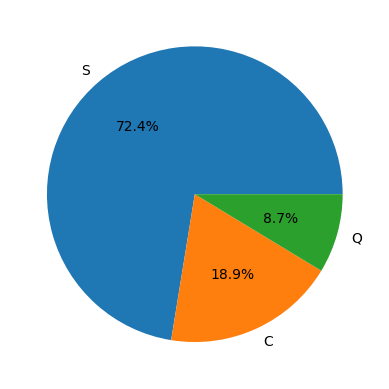

In [30]:
plt.pie(x=df['Embarked'].value_counts().values, labels=df['Embarked'].value_counts().index, autopct='%1.1f%%')
plt.show()

- Strategies for handling missing values
    - As Age approximates a normal distribution, assign the mean value to Age based on the titles in the Name column.
    - Cabin has a missing value percentage of 77%, which is too much. Delete that column.
    - There are 2 missing values in Embarked. Fill them with the most common value 'S' based on its percentage.

# Step 3: Data Preprocessing

## Data Cleaning

### Missing Data Handling

In [31]:
import re

def name_title(x):
    return x.split('.')[0].split(' ')[-1]

df['Name'].apply(name_title).value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [32]:
df['NameTitle'] = df['Name'].apply(name_title)
df.sample(5, random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,Mr
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S,Mr
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,Master
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Mrs


In [33]:
# Calculate the mean value based on grouping
group_means = df.groupby('NameTitle')['Age'].mean()

# Fill in missing values
df['Age'] = df['Age'].fillna(df['NameTitle'].map(group_means))
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna('S', inplace=True)
df.sample(5, random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle
495,496,0,3,"Yousseff, Mr. Gerious",male,32.368090,0,0,2627,14.4583,C,Mr
648,649,0,3,"Willey, Mr. Edward",male,32.368090,0,0,S.O./P.P. 751,7.5500,S,Mr
278,279,0,3,"Rice, Master. Eric",male,7.000000,4,1,382652,29.1250,Q,Master
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.898148,1,0,PC 17569,146.5208,C,Mrs
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.000000,0,2,2650,15.2458,C,Mrs


In [34]:
# Extract non-alphabetic characters from each cell
symbols_per_cell = df['Name'].apply(lambda x: ''.join([char for char in x if not char.isalpha()]))

# Get all distinct symbols
unique_symbols = set(''.join(symbols_per_cell))
unique_symbols

{' ', '"', "'", '(', ')', ',', '-', '.', '/'}

### Remove Noise and Standardize Text Content

In [35]:
def remove_noise(x):
    return re.sub(r'[".,()]+', '', x)

def ticket_pref(x):
    if len(x.split(' ')) == 1:
        return 'nan'
    else:
        x = ".".join(x.split(' ')[:-1])
        return re.sub(r'[./]+', '', x).lower()

def ticket_ID(x):
    x = x.split(' ')[-1]
    return int(x) if x.isdigit() else 0

df['Name'] = df['Name'].apply(remove_noise)
df['TicketPref'] = df['Ticket'].apply(ticket_pref)
df['TicketID'] = df['Ticket'].apply(ticket_ID)
df.sample(5, random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,TicketPref,TicketID
495,496,0,3,Yousseff Mr Gerious,male,32.368090,0,0,2627,14.4583,C,Mr,nan,2627
648,649,0,3,Willey Mr Edward,male,32.368090,0,0,S.O./P.P. 751,7.5500,S,Mr,sopp,751
278,279,0,3,Rice Master Eric,male,7.000000,4,1,382652,29.1250,Q,Master,nan,382652
31,32,1,1,Spencer Mrs William Augustus Marie Eugenie,female,35.898148,1,0,PC 17569,146.5208,C,Mrs,pc,17569
255,256,1,3,Touma Mrs Darwis Hanne Youssef Razi,female,29.000000,0,2,2650,15.2458,C,Mrs,nan,2650


In [36]:
y = df['Survived']
X = df.drop(['PassengerId', 'Survived', 'Ticket', 'NameTitle'], axis=1)
X.sample(5, random_state=0)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPref,TicketID
495,3,Yousseff Mr Gerious,male,32.368090,0,0,14.4583,C,nan,2627
648,3,Willey Mr Edward,male,32.368090,0,0,7.5500,S,sopp,751
278,3,Rice Master Eric,male,7.000000,4,1,29.1250,Q,nan,382652
31,1,Spencer Mrs William Augustus Marie Eugenie,female,35.898148,1,0,146.5208,C,pc,17569
255,3,Touma Mrs Darwis Hanne Youssef Razi,female,29.000000,0,2,15.2458,C,nan,2650


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Name        891 non-null    object 
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   TicketPref  891 non-null    object 
 9   TicketID    891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


## Data Transformation

- Text Data Processing
    - For the "Name" column, perform feature extraction using TF-IDF (Term Frequency-Inverse Document Frequency).
    - Encode features for "Sex," "Embarked," and "TicketPref" using one-hot encoding.

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Extracting columns with numerical features
numeric_columns = selector(dtype_include='number')

# Define each step in the pipeline
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to specify the processing method for each column
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'Name'),
        ('categorical', categorical_transformer, ['Sex', 'Embarked', 'TicketPref']),
        ('numeric', numeric_transformer, numeric_columns)
    ])

# Create a complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Use a pipeline to process data
X_processed = pipeline.fit_transform(X)

# Step 4: Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

# Splitting the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 1549), (179, 1549), (712,), (179,))

# Step 5: Modeling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report
import numpy as np

# Create Logistic Regression 
lr = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': list(range(5, 50, 1)),
}

# Set the scoring metric
scorer = make_scorer(accuracy_score)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring=scorer,
    cv=5 # Using 5-fold cross-validation
)

# Run grid search
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model on the test set
lr_model = grid_search.best_estimator_
y_pred = lr_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 10.0, 'max_iter': 38}
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



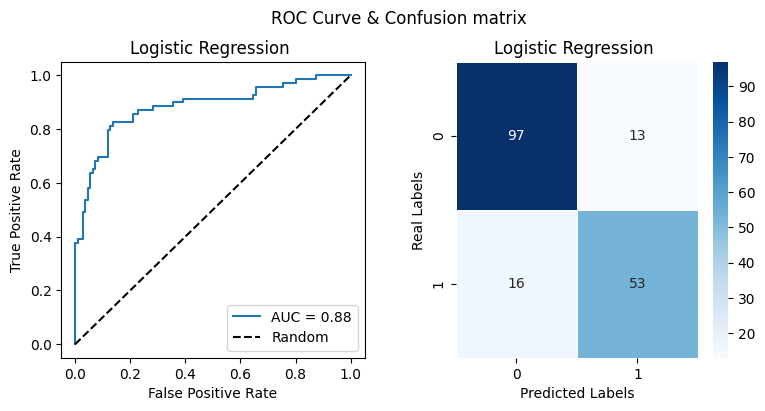

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Predicted probability scores
y_scores = lr_model.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'wspace': 0.3, 'top':0.85})
fig.suptitle('ROC Curve & Confusion matrix')

# Calculate the values of the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC（Area Under the Curve）
auc = roc_auc_score(y_test, y_scores)

plt.sca(axes[0])
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ')
plt.legend()

plt.sca(axes[1])
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Logistic Regression ')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.show()

# Step 6: Predicting

In [42]:
# Load the test set
test = pd.read_csv("test.csv")

# Data preprocessing
test['NameTitle'] = test['Name'].apply(name_title)
group_means = test.groupby('NameTitle')['Age'].mean()
test['Age'].fillna(df['NameTitle'].map(group_means), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Name'] = test['Name'].apply(remove_noise)
test['TicketPref'] = test['Ticket'].apply(ticket_pref)
test['TicketID'] = test['Ticket'].apply(ticket_ID)
test.drop(['PassengerId', 'Ticket', 'Cabin', 'NameTitle'], axis=1, inplace=True)
test.sample(5, random_state=0)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPref,TicketID
360,3,Sage Master William Henry,male,14.500000,8,2,69.5500,S,ca,2343
170,3,Lithman Mr Simon,male,32.000000,0,0,7.5500,S,sopp,251
224,1,Candee Mrs Edward Helen Churchill Hungerford,female,53.000000,0,0,27.4458,C,pc,17606
358,3,O'Keefe Mr Patrick,male,21.774844,0,0,7.7500,Q,nan,368402
309,3,Hansen Mrs Claus Peter Jennie L Howard,female,45.000000,1,0,14.1083,S,nan,350026


In [43]:
# Data Transformation
X_test_processed = pipeline.transform(test)
X_test_processed.shape

(418, 1549)

In [44]:
# Predicting
val = lr_model.predict(X_test_processed)
sub = pd.read_csv("gender_submission.csv")
sub['Survived'] = val
sub.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
